Demonstration of an objective function with multiple minima and optimization with gradient-based methods.

https://scipy-lectures.org/advanced/mathematical_optimization/#gradient-based-methods

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from autograd import numpy as np
from autograd import grad
from autograd import hessian

from scipy import optimize as opt
from matplotlib import pyplot as plt

In [3]:
import initdirs

from pdata.optimize import eval_grad_on_meshgrid

$f(x, y) = sin(x) + (1 - y) sin(x) + 0.2 x^2 + 0.2 y^2 + 3$

In [4]:
# Another interesting option:
#return (1 - x[0]) * np.sin(x[0]) + np.cos(x[1]) + 0.3 * (x[0] - 3)**2 + 0.05 * x[1]**2

      fun: 7.5006034489142515
 hess_inv: array([[ 0.8342963 , -0.00939149],
       [-0.00939149,  0.16919982]])
      jac: array([-4.47034836e-06,  2.44379044e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([-1.11051395,  7.53247685])

      fun: 0.2510289678553961
 hess_inv: array([[0.75549041, 0.0021045 ],
       [0.0021045 , 0.30207029]])
      jac: array([-4.47034836e-07,  1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 10
     njev: 16
   status: 0
  success: True
        x: array([-1.11051086, -1.68909433])


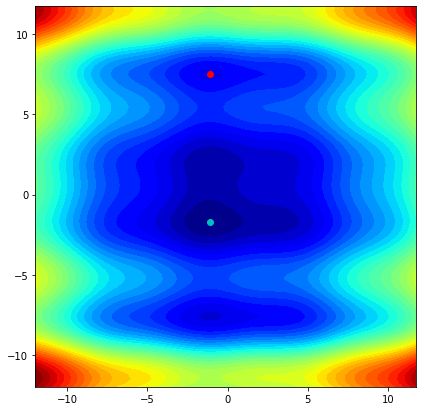

In [5]:
SIZE = 12

x_range = np.arange(-SIZE, SIZE, 0.25)
y_range = np.arange(-SIZE, SIZE, 0.25)
domain_xy = np.meshgrid(x_range, y_range)

def func(x):
    return np.sin(x[0]) + (1 - x[1]) * np.sin(x[1]) + 0.2 * x[0]**2 + 0.2 * x[1]**2 + 3

func_z = func(domain_xy)

res1 = opt.minimize(func, x0=[10, 10])
res2 = opt.minimize(func, x0=[7.5, 5])

print(res1)
print()
print(res2)


fig, ax = plt.subplots(figsize=(10, 7))
ax.set_aspect('equal')
ax.contourf(domain_xy[0], domain_xy[1], func_z, cmap='jet', levels=40)
ax.scatter(res1.x[0], res1.x[1], color='r')
ax.scatter(res2.x[0], res2.x[1], color='c')

plt.show()

In [6]:
func_grad = grad(func)
func_hess = hessian(func) # needed if method='Newton-CG' 

In [7]:
func([0, 0])

3.0

In [8]:
func_grad(np.array([0., 0.]))

array([1., 1.])

In [9]:
guess = [10, 5]

x_interim = [guess, ]

def monitor(x):
    x_interim.append(x)

res = opt.minimize(
    func, 
    x0=guess, 
    method='CG', 
    jac=func_grad,
    callback=monitor
)

print(res)

     fun: 0.25102896786580153
     jac: array([-2.22650715e-06,  7.53157861e-06])
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 7
    njev: 19
  status: 0
 success: True
       x: array([-1.11051222, -1.68909211])


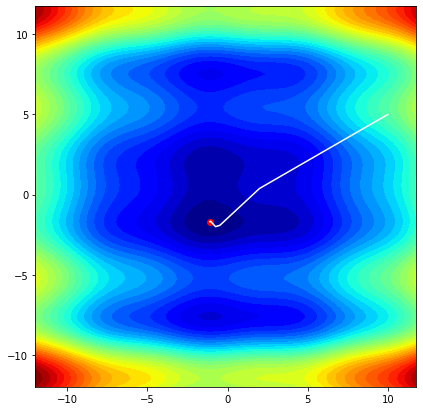

In [10]:
x_interim_np = np.array(x_interim)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_aspect('equal')

ax.contourf(domain_xy[0], domain_xy[1], func_z, cmap='jet', levels=40)

ax.plot(x_interim_np[:, 0], x_interim_np[:, 1], color='white')
ax.scatter(res.x[0], res.x[1], color='r')

plt.show()